### Check CUDA version

In [1]:
!nvcc  --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Nov_30_19:15:10_Pacific_Standard_Time_2020
Cuda compilation tools, release 11.2, V11.2.67
Build cuda_11.2.r11.2/compiler.29373293_0


### Install CUDA11.2 PaddlePaddle

In [2]:
!pip install paddlepaddle-gpu==2.3.2.post112 -f https://www.paddlepaddle.org.cn/whl/windows/mkl/avx/stable.html

Looking in links: https://www.paddlepaddle.org.cn/whl/windows/mkl/avx/stable.html


### Install paddle OCR

In [3]:
!pip install paddleocr

### Clone paddle OCR repo - get FONTS for visualization

In [4]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


### Import Dependencies

In [1]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os,io,sys
import numpy as np

### Instantiate Model and Detect

In [2]:
# Setup model
ocr_method = PaddleOCR(lang='en',use_angle_cls=True)

[2022/11/20 16:12:52] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Satya/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Satya/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec

In [7]:
image_path = '../ANPR_test/Outputs/no_plate.png'

In [8]:
input_image_file = Image.open(image_path).convert('RGB')

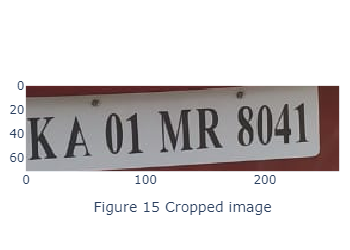

In [9]:
input_image_file

In [10]:
input_image_array = np.array(input_image_file)

In [11]:
# Run the ocr method on the ocr model
result = ocr_method.ocr(input_image_array,cls=True)

[2022/11/13 17:00:51] ppocr DEBUG: dt_boxes num : 9, elapse : 0.8636898994445801
[2022/11/13 17:00:52] ppocr DEBUG: cls num  : 9, elapse : 0.4129297733306885
[2022/11/13 17:00:52] ppocr DEBUG: rec_res num  : 9, elapse : 0.028955936431884766


In [12]:
for line in result:
    print(line)

[[[[9.0, 103.0], [26.0, 103.0], [26.0, 115.0], [9.0, 115.0]], ('20', 0.9995955228805542)], [[[10.0, 126.0], [24.0, 126.0], [24.0, 139.0], [10.0, 139.0]], ('40', 0.9975007772445679)], [[[38.0, 118.0], [305.0, 102.0], [307.0, 142.0], [40.0, 158.0]], ('A 01 MR 8041', 0.8774028420448303)], [[[9.0, 150.0], [26.0, 150.0], [26.0, 163.0], [9.0, 163.0]], ('60', 0.9966042041778564)], [[[22.0, 175.0], [31.0, 175.0], [31.0, 185.0], [22.0, 185.0]], ('0', 0.871924638748169)], [[[132.0, 172.0], [158.0, 172.0], [158.0, 187.0], [132.0, 187.0]], ('100', 0.9995413422584534)], [[[253.0, 172.0], [277.0, 172.0], [277.0, 187.0], [253.0, 187.0]], ('200', 0.9997273087501526)], [[[94.0, 200.0], [271.0, 201.0], [271.0, 215.0], [93.0, 214.0]], ('Figure 15 Cropped image', 0.9523428082466125)]]


#### Output will be a list, each item contains bounding box, text and recognition confidence

In [13]:
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]

In [14]:
ROOT = os.getcwd()
print(ROOT)

E:\INEURON_DATA\CV\ANPR_test


In [15]:
font_path = os.path.join(ROOT,'PaddleOCR','doc','fonts','latin.ttf')
print(font_path)

E:\INEURON_DATA\CV\ANPR_test\PaddleOCR\doc\fonts\latin.ttf


In [16]:
im_show = draw_ocr(input_image_file, boxes, txts, scores, font_path)

TypeError: '<' not supported between instances of 'tuple' and 'str'

In [ ]:
print(boxes)

In [ ]:
print(txts)

In [17]:
print(scores)

[('40', 0.9975007772445679)]
